In [1]:
import os
from datetime import datetime, time, date
from dataclasses import dataclass, field
from collections import defaultdict, namedtuple

import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

In [25]:
import struct
# Decode Binary Header part
# 32 Bytes

# 0 ... 3: Binary Header Separator
bin_sep = struct.Struct('>4s')
bin_separator = bin_sep.unpack(buffer[start:start+bin_sep.size])
start_next = start + bin_sep.size
print(bin_separator)

# 4 ... 5 Header Length (32 Byte)
head_len = struct.Struct('>2b')
head_length = head_len.unpack(buffer[start_next:start_next+head_len.size])
start_next = start_next + head_len.size
print(head_length)

# 6 ... 7 Byter Per Sample
b_per_sample = struct.Struct('>h')
bytes_per_sample = head_len.unpack(buffer[start_next:start_next+b_per_sample.size])
start_next = start_next + b_per_sample.size
print(bytes_per_sample)

# 8 ... 11 Number of Samples (h=0..F)
num_sample = struct.Struct('>I')
number_samples = num_sample.unpack(buffer[start_next:start_next+num_sample.size])
# number_of_samples = int.from_bytes(number_samples[0], byteorder='big')
start_next = start_next + num_sample.size
print(number_samples)

# 12 ... 15 Header Version (0100 for Version 1.0)
h_ver = struct.Struct('>4s')
header_version = h_ver.unpack(buffer[start_next:start_next+h_ver.size])
start_next = start_next + h_ver.size
print(header_version)

# 16 ... 19 Data Type, e.g. _PAR/_PLF etc (_ is a space; 0x20)
d_type = struct.Struct('>4s')
data_type = d_type.unpack(buffer[start_next:start_next+d_type.size])
start_next = start_next + d_type.size
print(data_type)

# 20 ... 27 Ident Number (resp. # see below)
ident_num = struct.Struct('>8s')
ident_number = ident_num.unpack(buffer[start_next:start_next+ident_num.size])
start_next = start_next + ident_num.size
print(ident_number)

# 28 ... 29 Subsident Number (vers. 1.1)
subsid_num = struct.Struct('>H')
subsident_num = subsid_num.unpack(buffer[start_next:start_next+subsid_num.size])
start_next = start_next + subsid_num.size
print(subsident_num)
# 30 ... 31 Flags 0..15; 0 - Complex Sample, 1 - Polar Coordinates, 2..15 - Reserve
# 0000 - real nums, 0001 - complex numbers with real and imaginary part
fl = struct.Struct('>H')
flags = fl.unpack(buffer[start_next:start_next+fl.size])
start_next = start_next + fl.size
print(flags)


(b'\xff\xff\xff\xff',)
(0, 32)
(0, 8)
(1956,)
(b'0101',)
(b' SLF',)
(b'00477280',)
(0,)
(1,)


In [27]:
start_next2 = start_next
noScans=1956 
startTimeRel2TRG=0.014090 
scanInterval=8.192021e-005

real = []
imag = []
times = []
# Data. Each sample - 8 bytes
samp = struct.Struct('>ll')

for i in range(noScans):
    sample = samp.unpack(buffer[start_next2:start_next2+samp.size])
    start_next2 = start_next2 + samp.size
    real.append(sample[1])
    imag.append(sample[0])
    
    if i == 1 :
        sample_time = startTimeRel2TRG
    else:
        sample_time = startTimeRel2TRG + scanInterval*i
        
    times.append(sample_time)




IndexError: tuple index out of range

In [219]:
imag

[3.783505853677006e-43,
 2.45227231256843e-43,
 1.0369608636003646e-43,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 4.0637655465419695e-44,
 2.536350220427919e-43,
 4.624284932271896e-43,
 6.291830104818429e-43,
 7.118596198770071e-43,
 7.328790968418793e-43,
 6.347882043391421e-43,
 4.4701421011961665e-43,
 1.9337918807682476e-43,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 2.14398665041697e-43,
 5.310921179791057e-43,
 7.160635152699815e-43,
 9.03837509489507e-43,
 1.0173426850998172e-42,
 1.0159413866354924e-42,
 9.542842542052004e-43,
 9.640933434554741e-43,
 8.954297187035581e-43,
 8.42180377059215e-43,
 7.81924543093248e-43,
 7.693128569143246e-43,
 7.959375277364961e-43,
 7.81924543093248e-43,
 7.66510259985675e-43,
 7.595037676640509e-43,
 7.2727390298458e-43,
 6.459985920537407e-43,
 6.866362475191604e-43,
 6.0395963812399616e-43,
 5.156778348715327e-43,
 4.694349855488137e-43,
 4.4701421011961665e-43,
 3.02680468

In [218]:
real

[nan,
 nan,
 nan,
 nan,
 5.184804318001823e-44,
 2.3541814200656927e-43,
 4.498168070482663e-43,
 5.8714405655209835e-43,
 5.913479519450728e-43,
 5.268882225861312e-43,
 4.44211613190967e-43,
 3.026804682941605e-43,
 1.2891945871788317e-43,
 nan,
 nan,
 nan,
 5.465064010866787e-44,
 1.2051166793193427e-43,
 2.4382593279251817e-43,
 3.1669345293740866e-43,
 2.8306228979361305e-43,
 1.3312335411085762e-43,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 1.4573504028978098e-43,
 4.512181055125911e-43,
 7.300764999132297e-43,
 9.262582849187041e-43,
 9.248569864543793e-43,
 8.533907647738136e-43,
 7.945362292721713e-43,
 6.8943884444781e-43,
 6.291830104818429e-43,
 6.235778166245436e-43,
 5.89946653480748e-43,
 6.628141736256385e-43,
 7.482933799494523e-43,
 8.26766093951642e-43,
 9.430738664906019e-43,
 1.0313556697430654e-42,
 1.0733946236728099e-42,
 1.0229478789571165e-42,
 9.837115219560216e-43,
 9.34666075704653e-43,
 8.561933617024632e-43,
 7.9313493080784

In [28]:
def elemD_(name: str, fmt: str, count=1):
    return (name, (fmt, count))

In [30]:
print(elemD_('u64', '2f', 1))

('u64', ('2f', 1))


In [10]:
m = np.array(imag) + np.array(real)

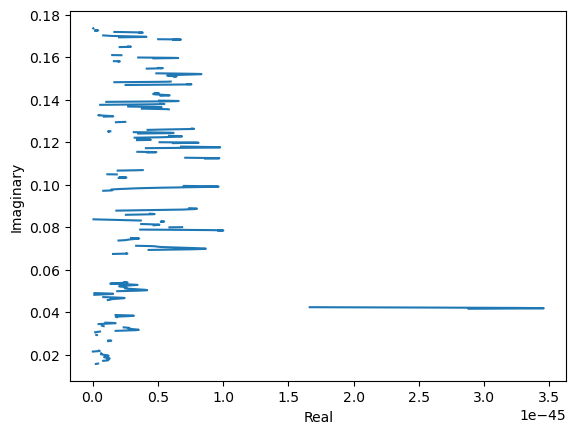

In [11]:
import matplotlib.pyplot as plt
import numpy as np
  
# create data of complex numbers using numpy
# data = np.array(real) + 1j*np.array(imag)
  
# # extract real part using numpy
# x = data.real
# # extract imaginary part using numpy
# y = data.imag

ampl = 7.10535e-05

x = real
y = imag
  
# plot the complex numbers
plt.plot(m*ampl,times)
plt.ylabel('Imaginary')
plt.xlabel('Real')
plt.show()